## `spafe.fbanks.gammatone_fbanks`

- Description : Gammatone filter banks implementation.
- Copyright (c) 2019-2022 Ayoub Malek. This source code is licensed under the terms of the BSD 3-Clause License. For a copy, see <[https://github.com/SuperKogito/spafe/blob/master/LICENSE](https://github.com/SuperKogito/spafe/blob/master/LICENSE)\>.


`spafe.fbanks.gammatone_fbanks.generate_center_frequencies(min_freq, max_freq, nfilts)`

计算 ERB 尺度的中心频率

参数：

- `min_freq (int)`：中心频率域最小频率
- `max_freq (int)`：中心频率域最大频率
- `nfilts (int)`：滤波器的个数，即需要计算的中心频率域数目

返回值：

- `(numpy.ndarray)`：中心频率数组

`spafe.fbank.gammatone_fbanks.compute_gain(fcs, B, wT, T)`

基于矩阵化的快速增益计算：

参数：

- `fcs (numpy.ndarray)`：中心频率
- `B (numpy.ndarray)`：滤波器的带宽
- `wT (numpy.ndarray)`：相对应于 `(omega)*T = 2*pi*freq*T`
- `T (flout)`：以秒为单位的周期也成为采样率的倒数


- `(numpy.ndarray)`：表示滤波器增益的 2D numpy 数组
- `(numpy.ndarray)`：用于最终计算的 2D numpy 数组


`spafe.fbanks.gammatone_fbanks.gammatone_filter_banks(nfilts=24, nfft=512, fs=16000, low_freq=0, high_freq=None, scale='constant', order=4, conversion_approach='Glasberg')`

计算 Gammatone 滤波器组，其中滤波器存储在行中，列对应于 FTT 的频率带

参数：

- `nfilts (int)`：滤波器组中滤波器的数目，默认为 20
- `nfft (int)`：FFT 的尺寸，默认为 512
- `fs (int)`：采样率/信号的采样频率，默认为 16000Hz
- `low_freq (int)`：`mel` 滤波器的最低频带边缘，默认为 0Hz
- `high_freq (int)`：滤波器的最低频带边缘，默认为 fs / 2
- `scale (str)`：滤波器组的单调性行为，默认为`constant`
- `order`：gammatone 滤波器的阶数，默认为 4
- `conversion_approach (str)`：`erb` 尺度转换方法，默认为 `Glasberg`

返回值：

- `(numpy.ndarray)`：包含滤波器组的 numpy 数组，其尺寸为 `滤波器数目 * (nfft / 2 + 1)`，每个行存储一个滤波器
- `(numpy.ndarray)`：中心频率的数组



**注意：**
> - `scale`：除了 `constant`，还可以设置为 `ascendant`、`descendant`

Ellis, D.P.W. (2009). “Gammatone-like spectrograms”, web resource. http://www.ee.columbia.edu/~dpwe/resources/matlab/gammatonegram/

下面为代码实现示例：

/home/liang/miniconda3/envs/pyannote/lib/python3.8/site-packages/spafe/utils/converters.py:68: RuntimeWarning: invalid value encountered in log10
  return A * np.log10(1 + f * 0.00437)


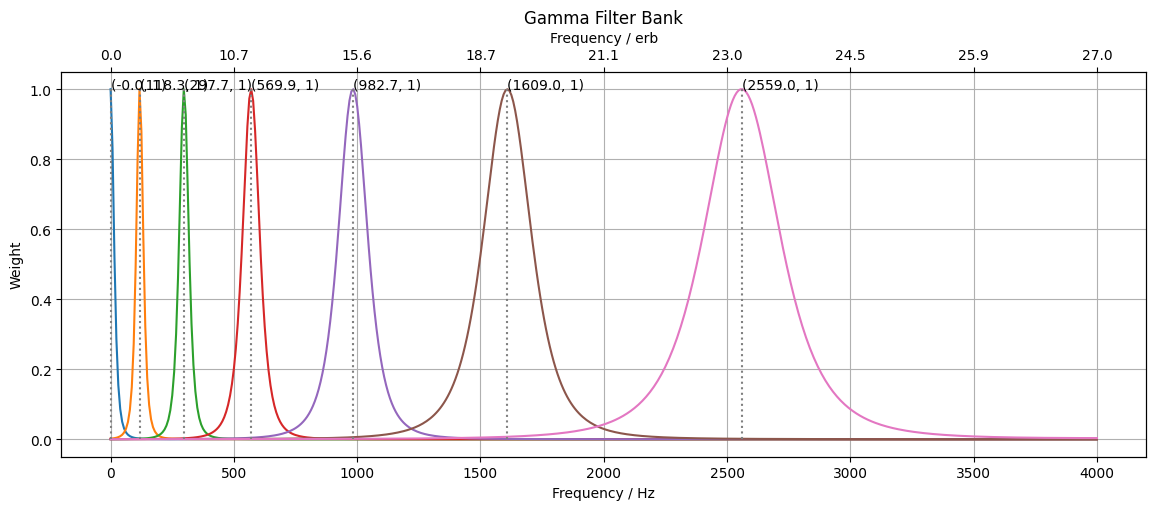

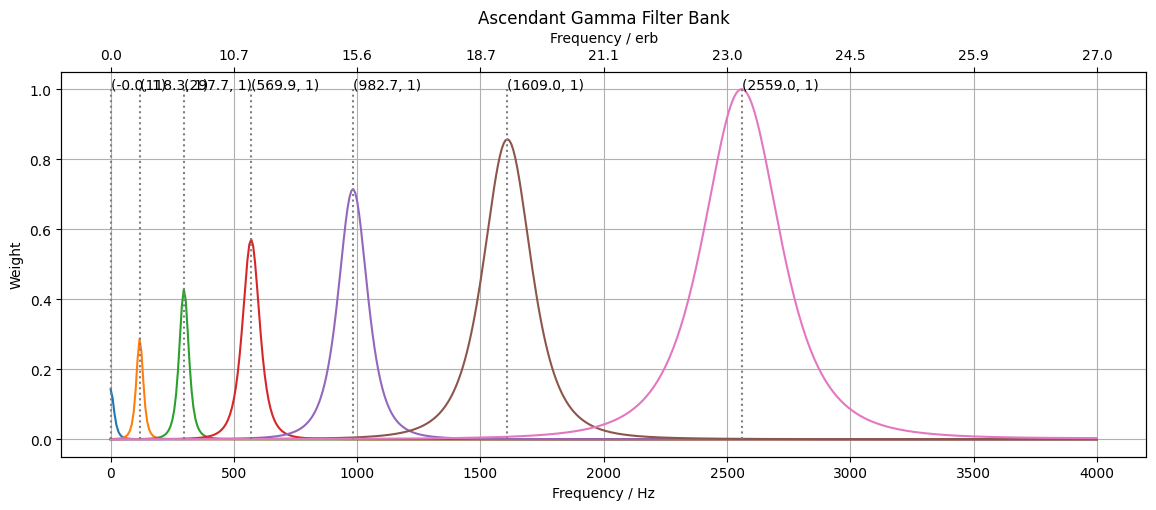

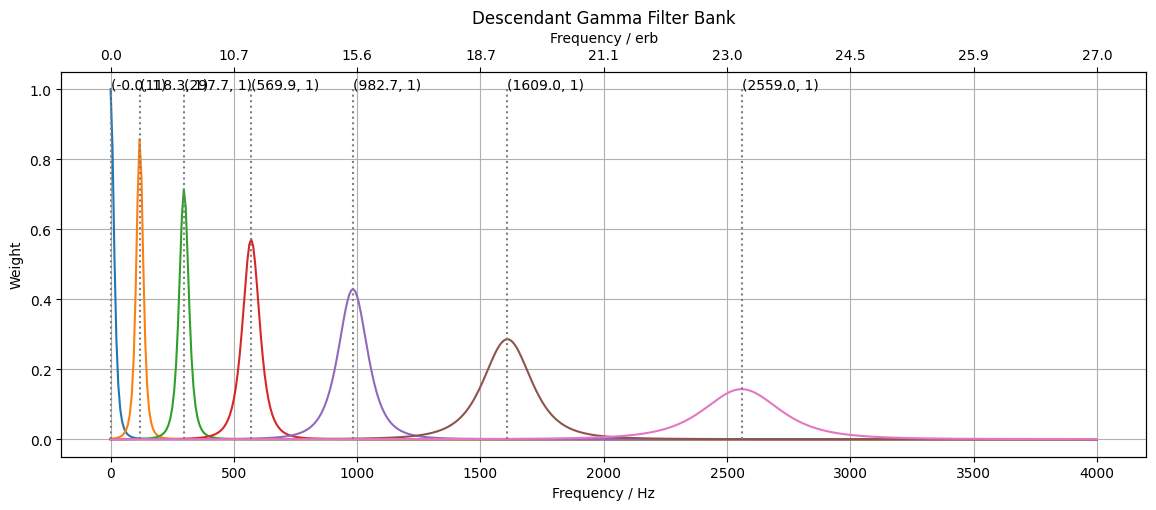

In [1]:
import numpy as np
from spafe.utils.converters import erb2hz
from spafe.utils.vis import show_fbanks
from spafe.fbanks.gammatone_fbanks import gammatone_filter_banks

# 初始化参数
fs = 8000
nfilts = 7
nfft = 1024
low_freq = 0
high_freq = fs / 2

# compute freq for xaxis
ghz_freqs = np.linspace(low_freq, high_freq, nfft // 2 + 1)

for scale, label in [("constant", ""), ("ascendant", "Ascendant "), ("descendant", "Descendant ")]:
    # 下面设置 gamma 滤波器组
    gamma_fbanks_mat, gamma_freqs = gammatone_filter_banks(
        nfilts=nfilts,
        nfft=nfft,
        fs=fs,
        low_freq=low_freq,
        high_freq=high_freq,
        scale=scale,
        order=4
    )

    # 绘制结果
    show_fbanks(
        gamma_fbanks_mat,
        [erb2hz(freq) for freq in gamma_freqs],
        ghz_freqs,
        label + "Gamma Filter Bank",
        ylabel="Weight",
        x1label="Frequency / Hz",
        x2label="Frequency / erb",
        figsize=(14, 5),
        fb_type="gamma"
    )